# Introduction to Linear Regression

Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

The advertising budgets are input variables while sales is an output variable. The input variables are typically denoted using the variable symbol X, with a subscript to distinguish them. So X1 might be the TV budget, X2 the radio budget, and X3 the newspaper budget. 

The inputs go by different names, such as predictors, independent variables, features,predictor independent variable feature or sometimes just variables. 

The output variable—sales—is often called the response or dependent variable, and is typically denoted using the symbol Y .

More generally, suppose that we observe a quantitative response Y and p different predictors, X1,X2, . . .,Xp. We assume that there is some relationship between Y and X = (X1,X2, . . .,Xp), which can be written in the very general form
Y = f(X) + e.
Here f is some fixed but unknown function of X1, . . . , Xp, and e is a random error term, which is independent of X and has mean zero.

In [5]:
import pandas as pd


In [6]:
#Load dataset
dataset = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
dataset.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


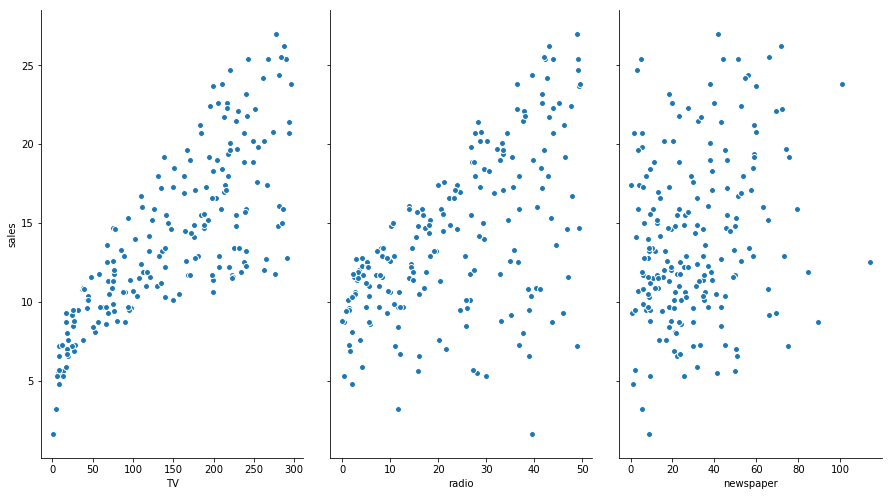

In [7]:
import seaborn as sns
% matplotlib inline
sns.pairplot(data=dataset, x_vars=['TV','radio','newspaper'],y_vars ='sales',size=7,aspect=0.6)

In [8]:
feature_cols = ['TV', 'radio','newspaper']
y=dataset['sales']
X=dataset[feature_cols]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=4)

In [9]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# print the intercept and coefficients
print("Linear Intercept :{0}".format(linreg.intercept_))
print("Linear Intercept :{0}".format(linreg.coef_))
list(zip(feature_cols, linreg.coef_))

Linear Intercept :3.0906443641251062
Linear Intercept :[ 0.04533392  0.17715767  0.00553852]


[('TV', 0.045333916933126897),
 ('radio', 0.17715766675060449),
 ('newspaper', 0.0055385204510282971)]

![math.png](math.png)

In [11]:
#Evaluvation Metrics 
y_pred = linreg.predict(X_test)
import numpy as np
from sklearn import metrics
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Square Error:1.4912326002041256


In [12]:
feature_cols = ['TV', 'radio']
y=dataset['sales']
X=dataset[feature_cols]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=4)
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("Root Mean Square Error:{0}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Square Error:1.461303046743432


# Using K-fold cross validation

In [13]:
print(dataset.info())
rows,columns =dataset.shape
print("no of rows:{0}".format(rows))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 17.8 KB
None
no of rows:200


In [14]:
feature_cols = ['TV', 'radio','newspaper']
y=dataset['sales']
X=dataset[feature_cols]
linreg = LinearRegression()
# splitting a dataset of m observations into  n folds
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
folds=10
kf_dict = dict([("fold_%s" % i,[]) for i in range(1, folds+1)])
fold = 0
average_mse=0
kf = KFold(n_splits=folds, shuffle=False)
for train_index, test_index in kf.split(dataset):
    fold += 1
     
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
     
    kf_dict["fold_%s" % fold].append(test_mse)



    
for key,value in kf_dict.items():
    print("{0}--{1}".format(key,value))

    
import numpy as np
array =np.array(list(kf_dict.values()))
#average_mse = np.mean(array)
average_rmse=np.sqrt(array).mean()
print("Average mean {0}".format(average_rmse))

fold_9--[3.0427310925428466]
fold_5--[1.3027753955557309]
fold_3--[2.0894335597314386]
fold_7--[8.173382141112377]
fold_1--[3.5603843790698897]
fold_6--[1.741636178645005]
fold_2--[3.2976752163384178]
fold_8--[2.114097461204687]
fold_4--[2.8247428262670531]
fold_10--[2.4528179307176847]
Average mean 1.6913531708051792


# Feature comparision

In [15]:
from sklearn.model_selection import cross_val_score
feature_cols = ['TV', 'radio','newspaper']
y=dataset['sales']
X=dataset[feature_cols]
linreg_cv = LinearRegression()
scores = abs(cross_val_score(linreg_cv, X, y, cv=10, scoring='neg_mean_squared_error'))
print(scores)
print(np.sqrt(scores).mean())

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]
1.69135317081


In [16]:
from sklearn.model_selection import cross_val_score
feature_cols = ['TV', 'radio']
y=dataset['sales']
X=dataset[feature_cols]
linreg_cv = LinearRegression()
scores = abs(cross_val_score(linreg_cv, X, y, cv=10, scoring='neg_mean_squared_error'))
print(scores)
print(np.sqrt(scores).mean())

[ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]
1.67967484191
